Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
import pandas as pd
import numpy as np
avocado= pd.read_csv('../avocado.csv')

In [2]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
avocado.shape

(18249, 14)

In [15]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
#trying to decide what to set as target, AveragePrice or type

In [12]:
avocado['AveragePrice'].value_counts(normalize=True)

1.15    0.011069
1.18    0.010905
1.08    0.010631
1.26    0.010576
1.13    0.010521
          ...   
3.05    0.000055
3.03    0.000055
2.91    0.000055
0.48    0.000055
2.96    0.000055
Name: AveragePrice, Length: 259, dtype: float64

In [16]:
avocado['type'].value_counts(normalize=True)

conventional    0.500082
organic         0.499918
Name: type, dtype: float64

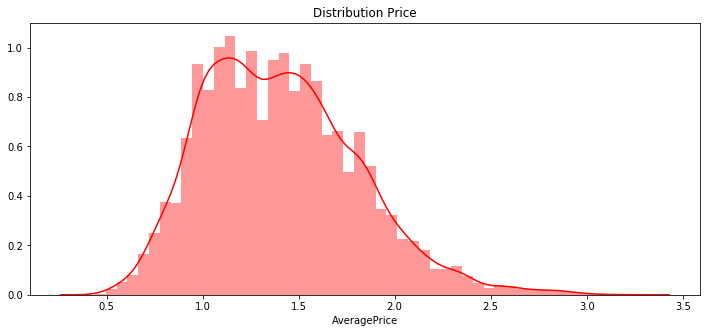

In [14]:
import matplotlib.pyplot as pl
import seaborn as sns
pl.figure(figsize=(12,5))
pl.title("Distribution Price")
ax = sns.distplot(avocado["AveragePrice"], color = 'r')

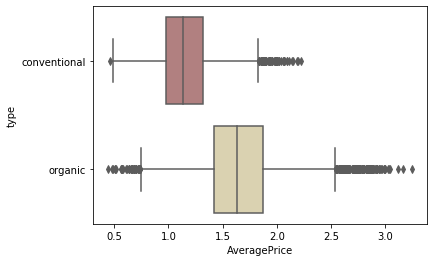

In [17]:
sns.boxplot(y="type", x="AveragePrice", data=avocado, palette = 'pink')

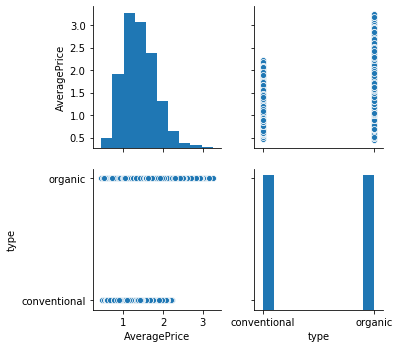

In [19]:
sns.pairplot(avocado, vars=['AveragePrice','type'])

In [7]:
# find outliers in feature1
cond1 = (avocado["AveragePrice"].quantile(0.01) < avocado["AveragePrice"]) | (avocado["AveragePrice"] < avocado["AveragePrice"].quantile(0.99))

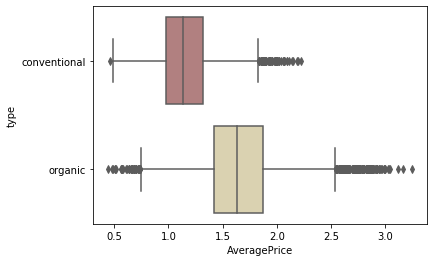

In [8]:
import seaborn as sns
sns.boxplot(y="type", x="AveragePrice", data=avocado, palette = 'pink')

In [2]:
#Split train into test and val
from sklearn.model_selection import train_test_split
train, test = train_test_split(avocado, train_size=0.85, test_size=0.15, 
                              stratify=avocado['type'], random_state=42)
train.shape,test.shape

((15511, 14), (2738, 14))

In [3]:
#Split train into train and val
train,val=train_test_split(train, train_size=0.85, test_size=0.15, 
                              stratify=train['type'], random_state=42)
train.shape,val.shape

((13184, 14), (2327, 14))

In [23]:
train.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8356,37,2017-04-16,1.23,35182320.78,12311055.17,10069354.29,650017.26,12151894.06,9399104.79,2544942.74,207846.53,conventional,2017,TotalUS
15595,6,2017-11-19,1.62,14161.90,176.40,275.71,9.39,13700.40,13700.40,0.00,0.00,organic,2017,HarrisburgScranton
15203,38,2017-04-09,1.95,57024.53,298.80,53040.02,0.00,3685.71,3685.71,0.00,0.00,organic,2017,Chicago
11361,51,2015-01-04,1.18,22630.58,13175.57,9028.34,0.00,426.67,426.67,0.00,0.00,organic,2015,SanFrancisco
11253,47,2015-02-01,1.22,13195.65,7103.90,5624.41,0.00,467.34,467.34,0.00,0.00,organic,2015,Sacramento


In [4]:
#Assigning target/features columns
target='type'
features = train.drop(columns=[target]).columns.tolist()
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test=test[target]

In [5]:
from sklearn.linear_model import LogisticRegression
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder



pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(random_state = 42)
)

pipeline.fit(X_train, y_train)

print('Train Accuracy', pipeline.score(X_train, y_train))
print('Val Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.9214199029126213
Val Accuracy 0.9222174473571122


C:\Users\subir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
# random forest classifier

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state = 42)
)

pipeline.fit(X_train, y_train)

print('Train Accuracy', pipeline.score(X_train, y_train))
print('Val Accuracy', pipeline.score(X_val, y_val))


Train Accuracy 0.9996207524271845
Val Accuracy 0.994413407821229


C:\Users\subir\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.plot(fpr, tpr)

ValueError: Data is not binary and pos_label is not specified

In [7]:
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_proba)

0.9988561251414607

C:\Users\subir\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


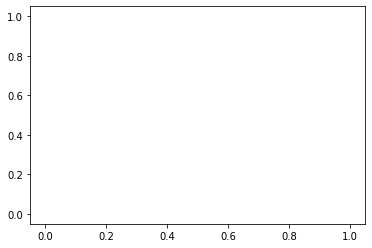

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba,pos_label=1)
plt.plot(fpr, tpr)

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, pipeline.predict_proba(X_val)[:, 1])
plt.plot(fpr, tpr)

ValueError: Data is not binary and pos_label is not specified

In [18]:
y_pred_proba

array([0. , 1. , 0. , ..., 0.3, 1. , 0. ])

In [49]:
# now setting target as price#Split train into test and val
from sklearn.model_selection import train_test_split
train, test = train_test_split(avocado, train_size=0.85, test_size=0.15, 
                              random_state=42)
train.shape,test.shape

((15511, 14), (2738, 14))

In [50]:
#Split train into train and val
train,val=train_test_split(train, train_size=0.85, test_size=0.15, 
                               random_state=42)
train.shape,val.shape

((13184, 14), (2327, 14))

In [52]:
#Assigning target/features columns
target='AveragePrice'
features = train.drop(columns=[target,'Unnamed: 0','Date','4046', '4225', '4770',]).columns.tolist()
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test=test[target]

In [53]:
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    LinearRegression()
)

pipeline.fit(X_train, y_train)

print('Train Accuracy', pipeline.score(X_train, y_train))
print('Val Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.3969528911694108
Val Accuracy 0.4017580812068758
